**EDA**


**Imports**


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
import seaborn as sns
from datetime import datetime

**Load Data**

In [9]:
boulderfiretweet= "boulder_fire_tweets.csv"
boulderfire = pd.read_csv(boulderfiretweet)
boulderfire.head()

,ImberJane,2022-03-28 22:56:22+00:00,RT @oliviaprentzel: Mandatory evacuation orders were issued for a wildfire just east of Estes Park... two days after the #NCAR fire sparked…,1508578772563501058
0,boulder_fire,2022-03-28 22:55:38+00:00,RT @BoulderOEM: Containment of #NCARFire is cu...,1508578590010621955
1,RachelAnneLevy,2022-03-28 22:47:19+00:00,"Climate change is dangerous and costly.,1\n\nW...",1508576497744891908
2,Boulderchick,2022-03-28 22:45:07+00:00,No more Fire!! #Boulder this up near Estes ht...,1508575942947467264
3,KhalaCompany,2022-03-28 22:40:19+00:00,"RT @rmpbs: ""The concern is that any time there...",1508574735940128778
4,KhalaCompany,2022-03-28 22:39:29+00:00,RT @CUBoulderENVS: As we return from Spring Br...,1508574525851672588


In [10]:
boulderfire = boulderfire.rename(columns={"ImberJane": "user", "2022-03-28 22:56:22+00:00" : "date","RT @oliviaprentzel: Mandatory evacuation orders were issued for a wildfire just east of Estes Park... two days after the #NCAR fire sparked…": "body","1508578772563501058":"id"})

In [11]:
datetime_object=[]
for i in range(0,len(boulderfire['date'])):
    datetime_object.append(datetime.strptime(boulderfire['date'][i][:-6], '%Y-%m-%d %H:%M:%S'))
boulderfire['date']=datetime_object
print(boulderfire.date)
boulderfire['hod'] = [(r.hour +24*(r.day))for r in boulderfire.date]
cats = boulderfire['hod'].unique()

0      2022-03-28 22:55:38
1      2022-03-28 22:47:19
2      2022-03-28 22:45:07
3      2022-03-28 22:40:19
4      2022-03-28 22:39:29
               ...        
4994   2022-03-26 21:54:37
4995   2022-03-26 21:54:32
4996   2022-03-26 21:54:31
4997   2022-03-26 21:54:28
4998   2022-03-26 21:54:27
Name: date, Length: 4999, dtype: datetime64[ns]


In [12]:
dic=[]
for i in cats:
    dic.append(boulderfire.query('hod == ' +'"'+ str(i) +'"').hod.count())
    

In [13]:
print(boulderfire['hod'])

0       694
1       694
2       694
3       694
4       694
       ... 
4994    645
4995    645
4996    645
4997    645
4998    645
Name: hod, Length: 4999, dtype: int64


<BarContainer object of 50 artists>

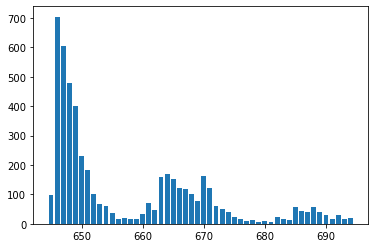

In [14]:
plt.bar(cats,dic)

In [2]:
import spacy

In [3]:
nlp = spacy.load("en_core_web_sm")

In [19]:
bodies=[]
for i in boulderfire['body']:
    bodies.append(nlp(i))

In [4]:
l=nlp("hello, this is a test")

In [9]:
for token in l:
    print(token.text)

hello
,
this
is
a
test


In [11]:
print(l[0].text)

hello


In [14]:
ret=[]
for token in l:
    ret.append(token.text)

In [15]:
print(ret)

['hello', ',', 'this', 'is', 'a', 'test']
